In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('/content/housing_prices.csv')

In [11]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [12]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.notnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,True,True,True,True,True,True,True,True,True,True,True,True,True
541,True,True,True,True,True,True,True,True,True,True,True,True,True
542,True,True,True,True,True,True,True,True,True,True,True,True,True
543,True,True,True,True,True,True,True,True,True,True,True,True,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---

In [31]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

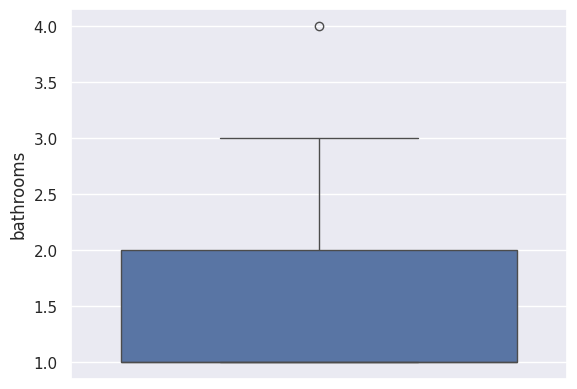

In [43]:
sns.boxplot(df['bathrooms'])
plt.show()

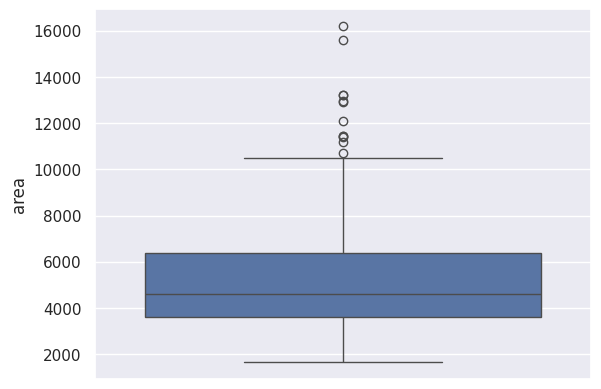

In [40]:
sns.boxplot(df['area'])
plt.show()

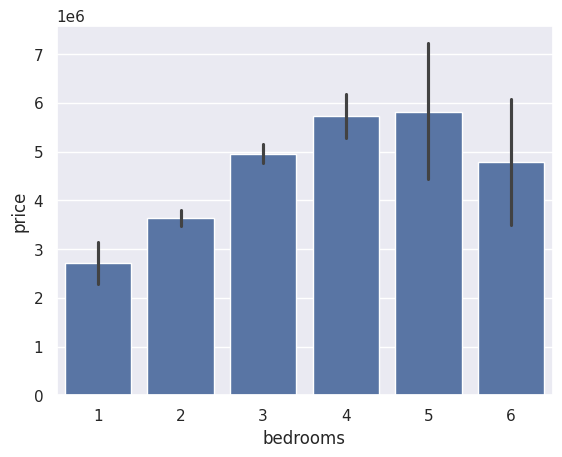

In [34]:
sns.barplot(x='bedrooms',y='price',data=df)
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['mainroad','guestroom','basement','furnishingstatus','prefarea','hotwaterheating','airconditioning']
for i in col:
  df[i] = encoder.fit_transform(df[i])


In [20]:
df1=df.loc[:, df.dtypes != "object"]
df1

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [21]:
corr=df1.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


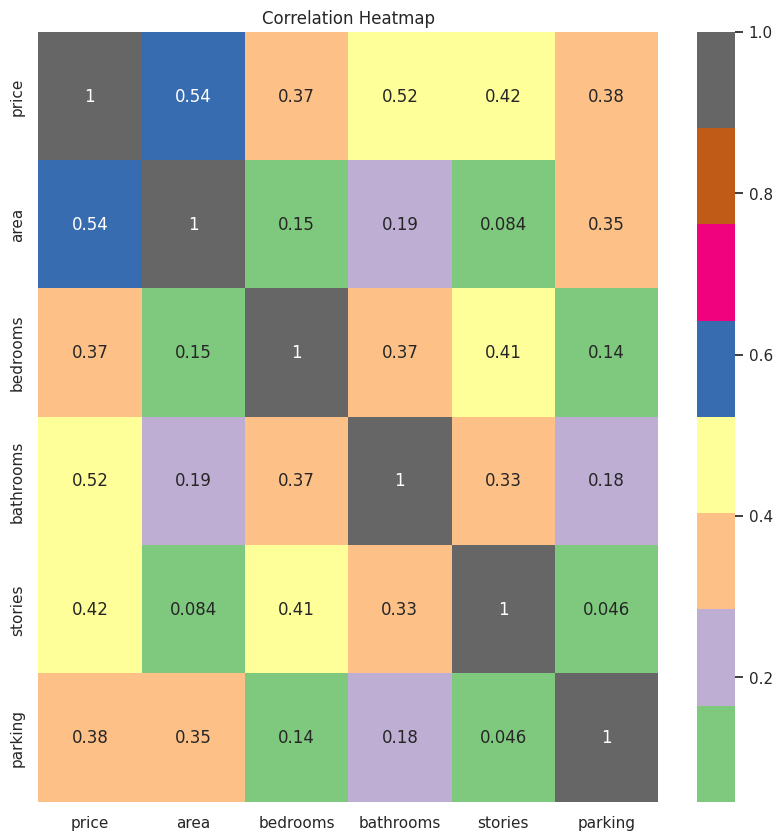

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='Accent', annot=True)
plt.title('Correlation Heatmap')
plt.show()

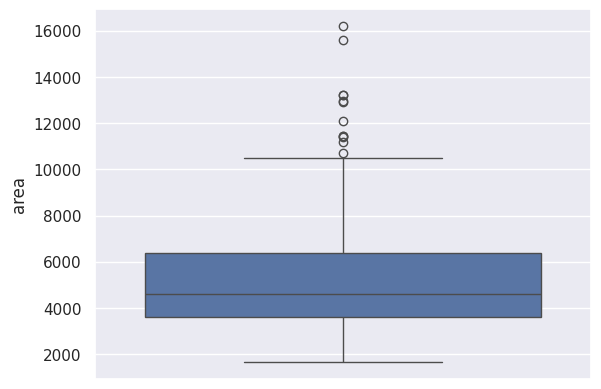

In [64]:
sns.boxplot(df['area'])
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
col1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x = df[col1]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.5975330689383515
Mean Squared Error: 1799212267535.9248
R^2 Score: 0.5037787585954687


In [71]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Square Error:", mse)
print("R^2 Score:", r2)

0.9264439140296592
Mean Square Error: 2135782366815.4436
R^2 Score: 0.4109530061827984


In [72]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Square Error:", mse)
print("R^2 Score:", r2)

0.9831881890831261
Mean Square Error: 2923563205429.358
R^2 Score: 0.19368370853229533


DATA_SET_3

In [102]:
data=pd.read_csv('/content/sentiment_dataset (2).csv')

In [105]:
data.shape

(53165, 6)

In [106]:
data.head()

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [107]:
data.isnull()

,val,id,timestamp,query,username,tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
53160,False,False,False,False,False,False
53161,False,False,False,False,False,False
53162,False,False,False,False,False,False
53163,False,False,False,False,False,False


In [108]:
data.dropna()

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
53159,0,1680084891,Sat May 02 10:52:05 PDT 2009,NO_QUERY,saekuto,@natahshapriya text me after 7 pm estern i'm ...
53160,0,1680085393,Sat May 02 10:52:09 PDT 2009,NO_QUERY,roogie,@maccast The 5.01 ep isn't on iTunes mobile yet.
53161,0,1680085398,Sat May 02 10:52:09 PDT 2009,NO_QUERY,Maughanster,im exhausted and sweaty
53162,0,1680085425,Sat May 02 10:52:09 PDT 2009,NO_QUERY,meznor,"Hi @backupblack. Going to #tfc. Excited, but i..."


In [109]:
data.head()

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53165 entries, 0 to 53164
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        53165 non-null  int64 
 1   id         53165 non-null  int64 
 2   timestamp  53165 non-null  object
 3   query      53165 non-null  object
 4   username   53165 non-null  object
 5   tweet      53164 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
sns.boxplot(x=data['timestamp'])
plt.show()

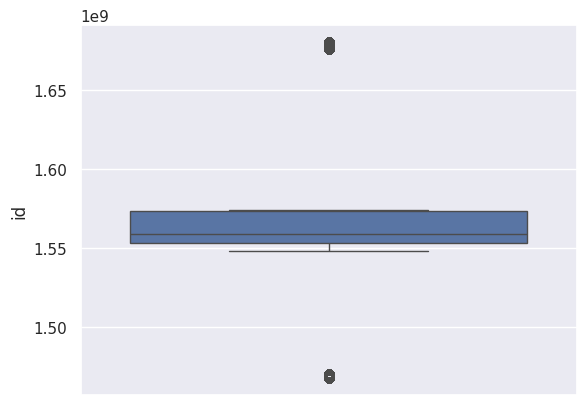

In [113]:
sns.boxplot(data['id'])
plt.show()

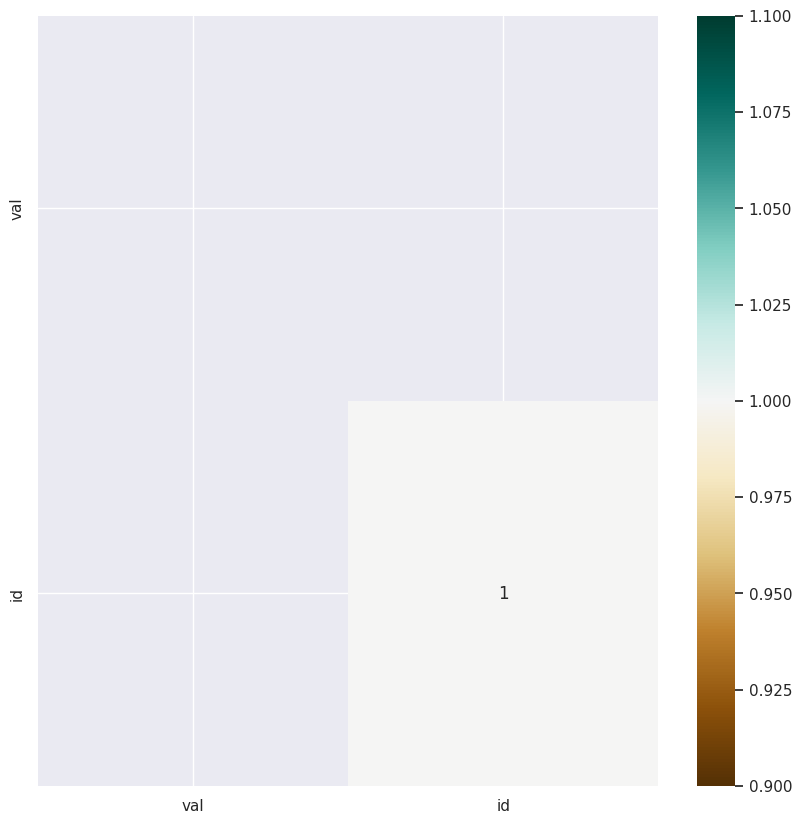

In [116]:
dff=data.loc[:, data.dtypes != "object"]
dff
corr=dff.corr()
corr
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='BrBG', annot=True)
plt.show()